# Un análisis a fondo de los factores que influyen en el salario

# **CAMBIAR**

**Motivación**: El absentismo y abandono laboral son costosos para la empresas, ya que estas emplean recursos para formar a trabajadores que pueden rendir por debajo de su potencial o incluso abandonar la empresa, llevándose consigo experiencia y formación valiosa. También existe un coste de oportunidad en la contractación asociado a que la compañía podría haber incorporado a otros empleados que sí aprovechasen los recursos invertdos. Por tanto, conocer los factores que influyen en el absentismo y abandono laboral es vital para que la empresa optimice sus costes laborales y decisiones de contratación.

**Objetivo**: El objetivo de este EDA es explorar los factores que influyen en el salario

Para explorar dichos factores, **asumiré una serie de relaciones** entre la variables objetivo (el salario mensual) y las variables explicativas

- **Hipótesis 1**: "El nivel de educación, los años de experiencia y el nivel de compromiso influyen positivamente en el salario mensual (existe una relación positiva)"
- **Hipótesis 2**: "El área de especialización tiene un impacto en el salario- El departamento en el que el empleado trabaja dentro de la empresa y su área de estudios influye en su salario mensual"
- **Hipótesis 3**:"La vida personal puede tener un impacto en el salario- El grado de satisfacción dentro de una relación sentimental, el estado matrimonial y la precepción del equilibrio entre la vida personal y laboral pueden tener influye en el salario mensual"
- **Hipótesis 4**: Relación entre variables explicativas

Al final del EDA comprobaré si dichas relaciones se cumplen.

## POSIBLE EXTENSION: Buscar relaciones con el SALARIO HORA

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

#### 1. DATASET ABANDONO LABORAL

- 1470 filas y 35 columnas
- CAMBIAR: Tras eliminar las columas redundantes quedan 30 columnas
- No hay 'missing values'
- CAMBIAR: 18 variables son enteros y 6 son objetos.
- Las variables 'objetos' son variables categóricas nominales
- Dentro de las variables numericas hay variables categóricas ordinales que toman los siguientes valores:
    - Education: 1 'Below College', 2 'College', 3 'Bachelor', 4 'Master', 5 'Doctor'
    - EnvironmentSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'
    - JobInvolvement: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'
    - JobSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'
    - PerformanceRating: 1 'Low', 2 'Good', 3 'Excellent', 4 'Outstanding'
    - RelationshipSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'
    - WorkLifeBalance: 1 'Bad', 2 'Good', 3 'Better', 4 'Best'

- Veré si conviene convertir las variables categóricas nominales en variables 'dummy' para realizar un mejor análisis

In [378]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\rafam\OneDrive\Documentos\GitHub\mi_copia_dsftmayo24semana1.1\semana 2 y 3\1_Data_Analysis\Entregas\EDA\WA_Fn-UseC_-HR-Employee-Attrition.tsv.txt', delimiter='\t')
df
df1 = pd.DataFrame(df)
fuente_1 = "https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset"

In [379]:
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [380]:
df1.dtypes


Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [381]:
df1.shape

(1470, 35)

In [382]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Elimino las columnas redundantes, de difícil interpretabilidad o ajenas a nuestro análisis 

In [383]:
df1['EmployeeCount'].value_counts()

EmployeeCount
1    1470
Name: count, dtype: int64

In [384]:
df1['StandardHours'].value_counts()

StandardHours
80    1470
Name: count, dtype: int64

In [385]:
df1['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

Variables como 'BusinessTravel', 'Distance from Home' y 'Daily Rate' son difíciles de interpretar en el contexto de mi análisis. Otras variables como 'Hourly rate' y 'Attrition' no me interesan, ya que me centro en encontrar información sobre el salario mensual, no sobre el salario hora, el abandono laboral u otras formas de retribución no salariales.  

In [386]:
columnas_redundantes= ['EmployeeCount', 'Over18', 'DailyRate', 'StandardHours', 'EmployeeNumber', 'MonthlyRate', 'BusinessTravel', 'DistanceFromHome', 'StockOptionLevel', 'Attrition', 'HourlyRate']

In [387]:
df1= df1.drop(columnas_redundantes, axis= 1)

In [388]:
df1.dtypes

Age                          int64
Department                  object
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [389]:
df1.dtypes.value_counts()

int64     18
object     6
Name: count, dtype: int64

In [390]:
df1.columns

Index(['Age', 'Department', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [391]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Department                1470 non-null   object
 2   Education                 1470 non-null   int64 
 3   EducationField            1470 non-null   object
 4   EnvironmentSatisfaction   1470 non-null   int64 
 5   Gender                    1470 non-null   object
 6   JobInvolvement            1470 non-null   int64 
 7   JobLevel                  1470 non-null   int64 
 8   JobRole                   1470 non-null   object
 9   JobSatisfaction           1470 non-null   int64 
 10  MaritalStatus             1470 non-null   object
 11  MonthlyIncome             1470 non-null   int64 
 12  NumCompaniesWorked        1470 non-null   int64 
 13  OverTime                  1470 non-null   object
 14  PercentSalaryHike       

In [392]:
df1.isnull().sum().sum()

0

In [393]:
df1.duplicated().sum()

0

In [394]:
df1.describe()

,Age,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,2.712245,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,1.081209,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,4.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [418]:
df1.iloc[:, :16].describe()

,Age,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741
std,9.135373,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000
25%,30.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000
50%,36.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000
75%,43.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000
max,60.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000


- Variable objetivo:
    - La salario mensual medio es de 6.500$. El salario mensual mediano (50% de las observaciones) es de 4.920$. El salario mensual mínimo es de 1.010$ al mes y el máximo de 20.000 $. Parece que la distribución tiene una asimetría positiva.

- Variables explicativas:
    - La edad media es 37 años. El mínimo es 18 años y el máximo es 60 años. Parece que tiene un distribución simétrica.
    - Los empleados de la compañía han trabajado en media para 2,7 empresas distintas. El 50% de los empleados ha trabajado en 2 empresas o menos. El empleado que ha trabajado en más empresas lo ha hecho en 9.
    - La valoración media del desempeño de los empleados es de 3, que equivale a 'excelente'. 

In [419]:
df1.iloc[:, 16:].describe()

,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2.712245,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,1.081209,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,4.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


- Variables explicativas:
    - La satisfacción media de los empleados con sus relaciones personales es 2.7. Es decir, está entre 'normal' y 'alta'. Más del 50% de los empleados tiene una satisfacción alta con sus relaciones personales.
    - La media del numero de años totales trabajados por los empleados de la empresa es de 11,3 años. El mínimo es 0 años y el máximo es 40 años. El 50% de los empleados de la empresa experiencia laboral inferior o igual a 10 años y el 75% ha trabajado al menos a 15 años. Parece que tiene una distribución con asimetría positiva. 
    - De media, los trabajadores han tenido 3 formaciones en el último año.
    - De media, los trabajadores consideran que tienen un equilibrio entre la vida profesional y laboral entre bueno (equivalente a 2) y muy bueno (equivalente a 3).
    - YEARS AT COMPANY, YEARS SINCE LAST PROMOTION

### ANÁLISIS UNIVARIANTE

In [397]:
df1

,Age,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Sales,2,Life Sciences,2,Female,3,2,Sales Executive,4,...,11,3,1,8,0,1,6,4,0,5
1,49,Research & Development,1,Life Sciences,3,Male,2,2,Research Scientist,2,...,23,4,4,10,3,3,10,7,1,7
2,37,Research & Development,2,Other,4,Male,2,1,Laboratory Technician,3,...,15,3,2,7,3,3,0,0,0,0
3,33,Research & Development,4,Life Sciences,4,Female,3,1,Research Scientist,3,...,11,3,3,8,3,3,8,7,3,0
4,27,Research & Development,1,Medical,1,Male,3,1,Laboratory Technician,2,...,12,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Research & Development,2,Medical,3,Male,4,2,Laboratory Technician,4,...,17,3,3,17,3,3,5,2,0,3
1466,39,Research & Development,1,Medical,4,Male,2,3,Healthcare Representative,1,...,15,3,1,9,5,3,7,7,1,7
1467,27,Research & Development,3,Life Sciences,2,Male,4,2,Manufacturing Director,2,...,20,4,2,6,0,3,6,2,0,3
1468,49,Sales,3,Medical,4,Male,2,2,Sales Executive,2,...,14,3,4,17,3,2,9,6,0,8


In [398]:
# countplot variables nominales
# countplot variables ordinales
# (barplot?) variables discretas 
# histplot, boxplot variables continuas

In [399]:
#!pip install statsmodels

### ANALÍSIS BIVARIANTE

#### Variables Categóricas (Nominales)

BusinessTravel              object
Department                  object
EducationField              object
Gender                      object
JobRole                     object
MaritalStatus               object
OverTime                    object

In [400]:
df.groupby('Department')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_30468\3610032312.py:1: FutureWarning: The provided callable <function mean at 0x0000020EDF841C60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('Department')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_30468\3610032312.py:1: FutureWarning: The provided callable <function median at 0x0000020EDF95C4A0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('Department')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
Department,,
Human Resources,6654.507937,3886.0
Research & Development,6281.252862,4374.0
Sales,6959.172646,5754.5


In [401]:
df.groupby('Attrition')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_30468\3631054969.py:1: FutureWarning: The provided callable <function mean at 0x0000020EDF841C60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('Attrition')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_30468\3631054969.py:1: FutureWarning: The provided callable <function median at 0x0000020EDF95C4A0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('Attrition')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
Attrition,,
No,6832.739659,5204.0
Yes,4787.092827,3202.0


In [402]:
df.groupby('Gender')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_30468\1116162445.py:1: FutureWarning: The provided callable <function mean at 0x0000020EDF841C60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('Gender')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_30468\1116162445.py:1: FutureWarning: The provided callable <function median at 0x0000020EDF95C4A0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('Gender')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
Gender,,
Female,6686.566327,5081.5
Male,6380.507937,4837.5


In [403]:
df.groupby('MaritalStatus')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_30468\4177486508.py:1: FutureWarning: The provided callable <function mean at 0x0000020EDF841C60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('MaritalStatus')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_30468\4177486508.py:1: FutureWarning: The provided callable <function median at 0x0000020EDF95C4A0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('MaritalStatus')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
MaritalStatus,,
Divorced,6786.287462,5131.0
Married,6793.671620,5204.0
Single,5889.472340,4536.0


In [404]:
df.groupby('MaritalStatus')['Age'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_30468\1323791143.py:1: FutureWarning: The provided callable <function mean at 0x0000020EDF841C60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('MaritalStatus')['Age'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_30468\1323791143.py:1: FutureWarning: The provided callable <function median at 0x0000020EDF95C4A0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('MaritalStatus')['Age'].agg([np.mean, np.median])


,mean,median
MaritalStatus,,
Divorced,37.489297,37.0
Married,37.757801,36.0
Single,35.336170,34.0


In [405]:
df.groupby('JobRole')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_30468\1251108155.py:1: FutureWarning: The provided callable <function mean at 0x0000020EDF841C60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('JobRole')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_30468\1251108155.py:1: FutureWarning: The provided callable <function median at 0x0000020EDF95C4A0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('JobRole')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
JobRole,,
Healthcare Representative,7528.763359,6811.0
Human Resources,4235.750000,3093.0
Laboratory Technician,3237.169884,2886.0
Manager,17181.676471,17454.5
Manufacturing Director,7295.137931,6447.0
Research Director,16033.550000,16510.0
Research Scientist,3239.972603,2887.5
Sales Executive,6924.279141,6231.0
Sales Representative,2626.000000,2579.0


#### Variables Categóricas (Ordinales)

In [406]:
df.groupby('Education')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_30468\4016758584.py:1: FutureWarning: The provided callable <function mean at 0x0000020EDF841C60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('Education')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_30468\4016758584.py:1: FutureWarning: The provided callable <function median at 0x0000020EDF95C4A0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('Education')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
Education,,
1,5640.570588,3849.0
2,6226.645390,4891.5
3,6517.263986,4762.0
4,6832.402010,5341.5
5,8277.645833,6203.0


Education: 1 'Below College', 2 'College', 3 'Bachelor', 4 'Master', 5 'Doctor'

In [407]:
df.groupby('EnvironmentSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_30468\3845046053.py:1: FutureWarning: The provided callable <function mean at 0x0000020EDF841C60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('EnvironmentSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_30468\3845046053.py:1: FutureWarning: The provided callable <function median at 0x0000020EDF95C4A0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('EnvironmentSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
EnvironmentSatisfaction,,
1,6717.080986,5020.5
2,6283.728223,4963.0
3,6482.366446,4855.0
4,6528.511211,4872.5


EnvironmentSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'

In [408]:
df.groupby('JobInvolvement')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_30468\806631547.py:1: FutureWarning: The provided callable <function mean at 0x0000020EDF841C60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('JobInvolvement')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_30468\806631547.py:1: FutureWarning: The provided callable <function median at 0x0000020EDF95C4A0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('JobInvolvement')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
JobInvolvement,,
1,6418.108434,5346.0
2,6609.648000,5163.0
3,6521.637097,4815.5
4,6161.159722,4888.0


JobInvolvement: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'

In [409]:
df.groupby('JobSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_30468\244261045.py:1: FutureWarning: The provided callable <function mean at 0x0000020EDF841C60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('JobSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_30468\244261045.py:1: FutureWarning: The provided callable <function median at 0x0000020EDF95C4A0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('JobSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
JobSatisfaction,,
1,6561.570934,4968.0
2,6527.328571,4853.0
3,6480.495475,4788.5
4,6472.732026,5126.0


JobSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'

In [410]:
df.groupby('PerformanceRating')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_30468\1954906032.py:1: FutureWarning: The provided callable <function mean at 0x0000020EDF841C60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('PerformanceRating')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_30468\1954906032.py:1: FutureWarning: The provided callable <function median at 0x0000020EDF95C4A0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('PerformanceRating')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
PerformanceRating,,
3,6537.274116,4965.5
4,6313.893805,4777.0


PerformanceRating: 1 'Low', 2 'Good', 3 'Excellent', 4 'Outstanding'

In [411]:
df.groupby('RelationshipSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_30468\2853107831.py:1: FutureWarning: The provided callable <function mean at 0x0000020EDF841C60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('RelationshipSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_30468\2853107831.py:1: FutureWarning: The provided callable <function median at 0x0000020EDF95C4A0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('RelationshipSatisfaction')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
RelationshipSatisfaction,,
1,6177.793478,4745.0
2,6596.983498,4950.0
3,6543.773420,4907.0
4,6601.296296,5027.0


RelationshipSatisfaction: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'

In [412]:
df.groupby('WorkLifeBalance')['MonthlyIncome'].agg([np.mean, np.median])

C:\Users\rafam\AppData\Local\Temp\ipykernel_30468\49404431.py:1: FutureWarning: The provided callable <function mean at 0x0000020EDF841C60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('WorkLifeBalance')['MonthlyIncome'].agg([np.mean, np.median])
C:\Users\rafam\AppData\Local\Temp\ipykernel_30468\49404431.py:1: FutureWarning: The provided callable <function median at 0x0000020EDF95C4A0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('WorkLifeBalance')['MonthlyIncome'].agg([np.mean, np.median])


,mean,median
WorkLifeBalance,,
1,5887.137500,4269.5
2,6461.808140,4970.0
3,6532.232923,4941.0
4,6746.352941,5067.0


WorkLifeBalance: 1 'Bad', 2 'Good', 3 'Better', 4 'Best'

In [422]:
df1.groupby('TrainingTimesLastYear')['MonthlyIncome'].agg(np.mean)

C:\Users\rafam\AppData\Local\Temp\ipykernel_30468\1519635214.py:1: FutureWarning: The provided callable <function mean at 0x0000020EDF841C60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df1.groupby('TrainingTimesLastYear')['MonthlyIncome'].agg(np.mean)


TrainingTimesLastYear
0    6213.907407
1    6746.507042
2    6643.177331
3    6480.608961
4    6214.991870
5    6484.806723
6    6043.430769
Name: MonthlyIncome, dtype: float64

#### Variables Numéricas

Dentro de las variables numéricas, me ecentraré en este caso en la correlación entre las variables contínuas

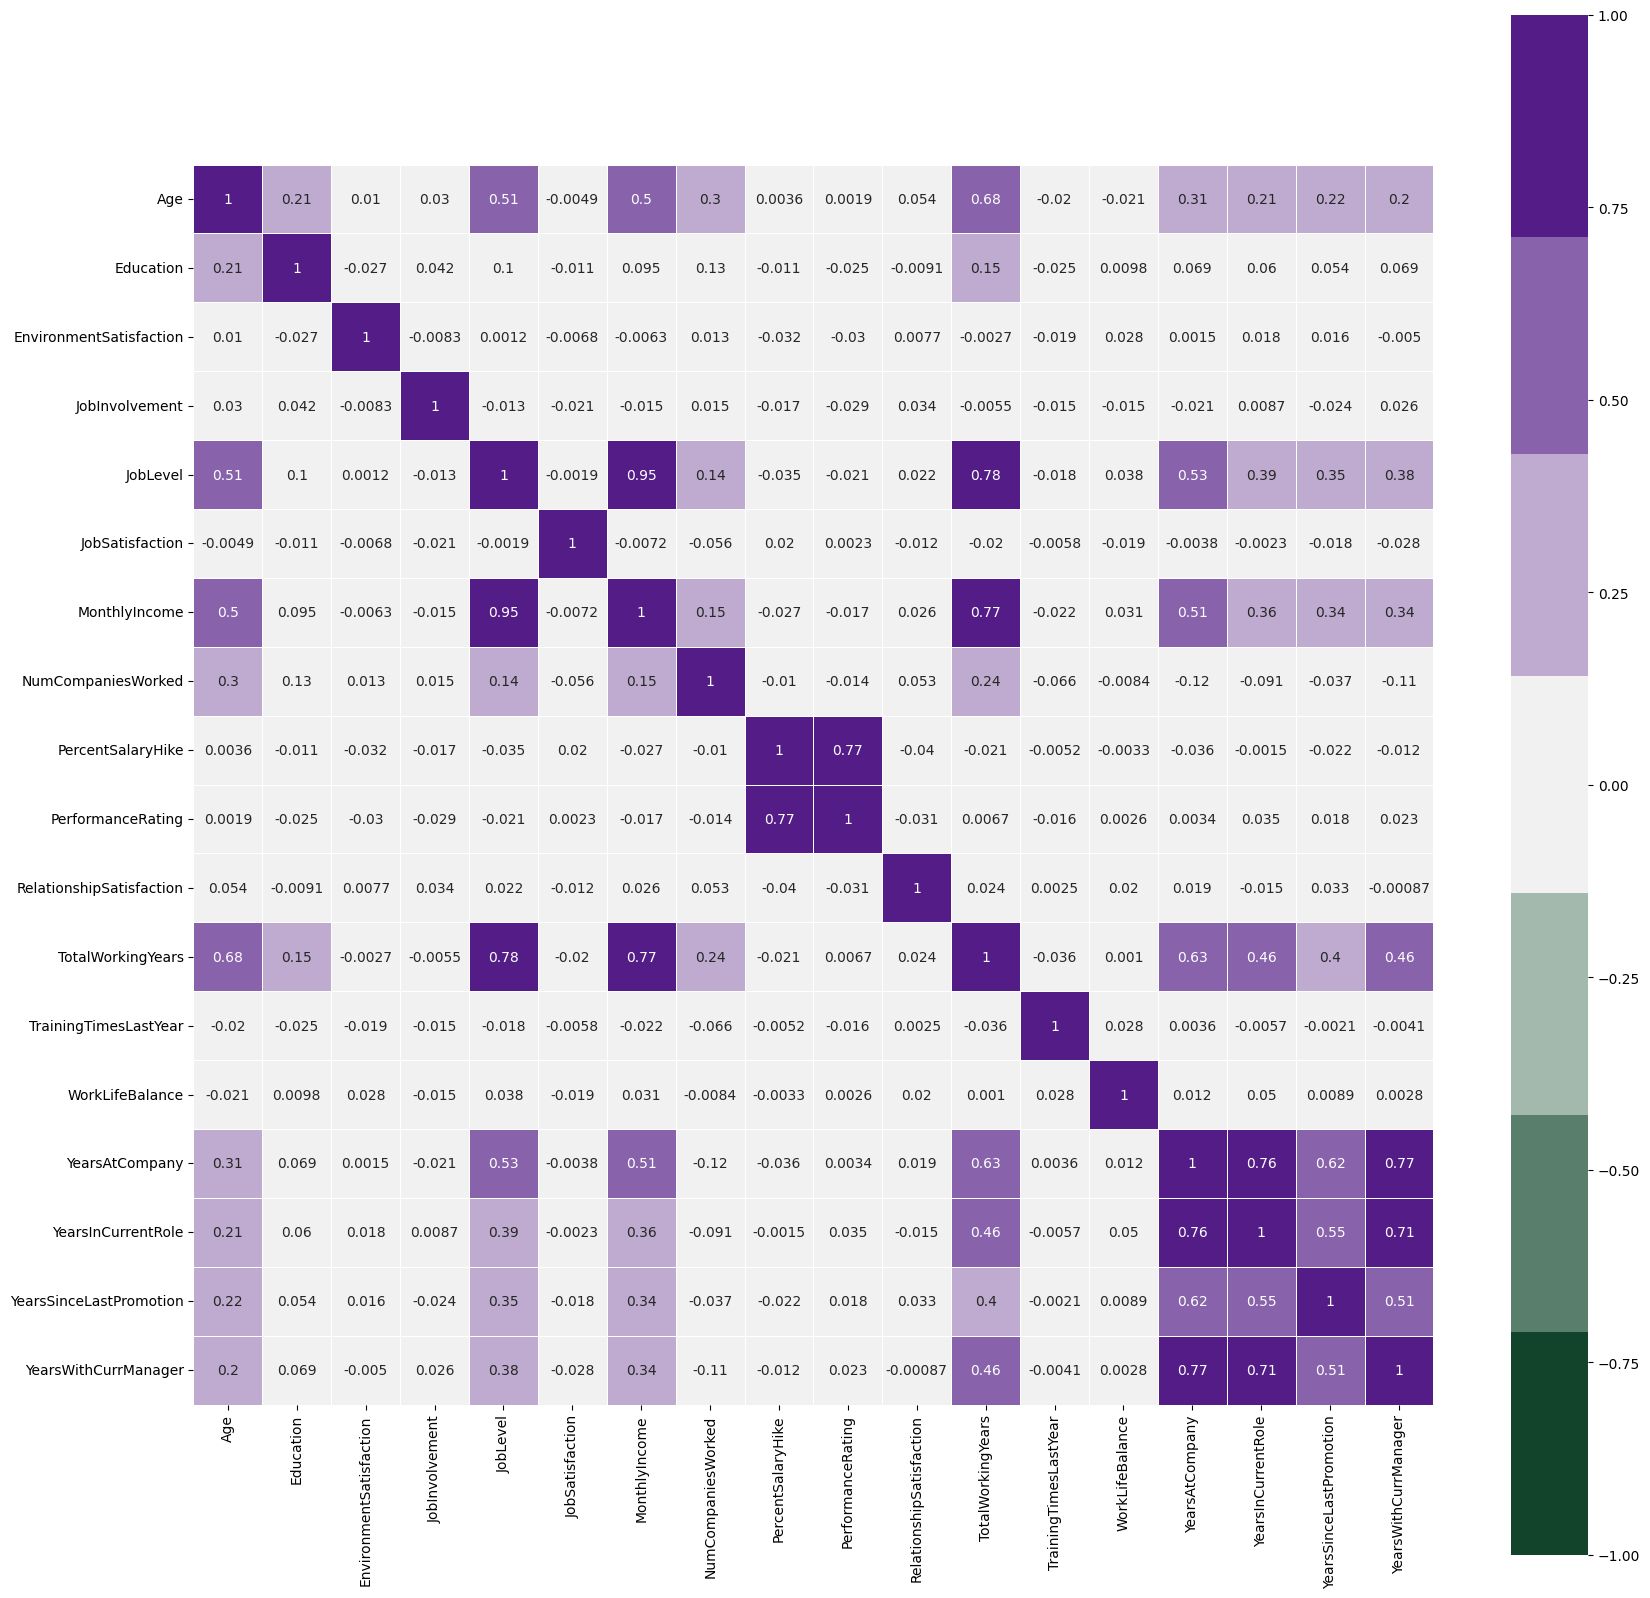

In [413]:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(numeric_only=True),vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True, linewidths=.5, annot=True);

WorkLifeBalance: 1 'Bad', 2 'Good', 3 'Better', 4 'Best'

### ANÁLISIS MULTIVARIANTE

In [414]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [415]:
counted = pd.pivot_table(df1, index="Education", columns="EducationField", values="Attrition", aggfunc="count")
counted

KeyError: 'Attrition'

In [ ]:
counted2 = pd.pivot_table(df1, index="Education", columns="EducationField", values="Attrition", aggfunc="sum")
counted2

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Education,,,,,,
1,1,8,4,10,2,6
2,0,18,6,15,1,4
3,4,37,15,25,2,16
4,1,25,9,13,6,4
5,1,1,1,0,0,2


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
X = df1[['YearsAtCompany', 'Age', 'TotalWorkingYears']]

y = df1['MonthlyIncome']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     732.1
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          8.13e-291
Time:                        16:51:33   Log-Likelihood:                -13844.
No. Observations:                1470   AIC:                         2.770e+04
Df Residuals:                    1466   BIC:                         2.772e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1813.1434    363.72

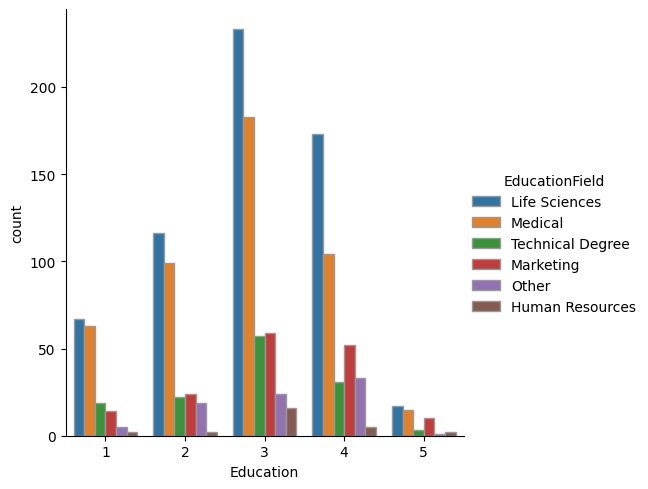

In [ ]:
sns.catplot(x="Education",
            hue="EducationField",
            kind="count",
            edgecolor=".6",
            orient = "V",
            data=df1);

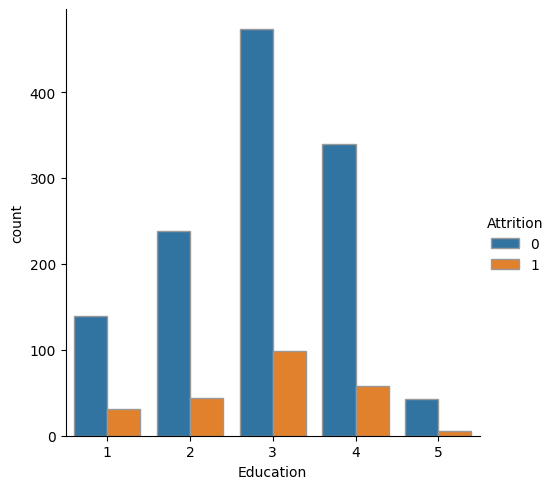

In [ ]:
sns.catplot(x="Education",
            hue="Attrition",
            kind="count",
            edgecolor=".6",
            orient = "V",
            data=df1);

<Figure size 2000x500 with 0 Axes>

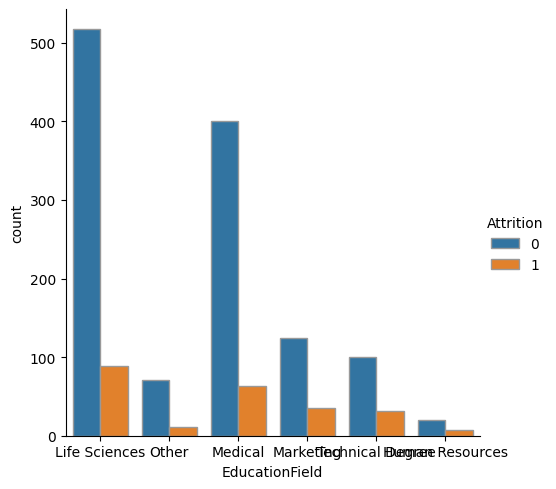

In [ ]:
plt.figure(figsize=(20,5))
sns.catplot(x="EducationField",
            hue="Attrition",
            kind="count",
            edgecolor=".6",
            orient = "V",
            data=df1)